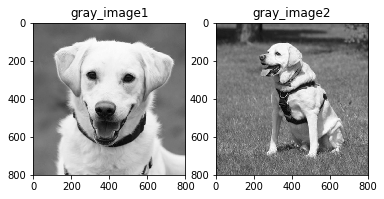

[[ 95  95  95 ..., 103 103 103]
 [ 95  95  95 ..., 103 103 103]
 [ 95  95  95 ..., 103 103 103]
 ..., 
 [110 110 110 ..., 196 196 195]
 [110 110 110 ..., 196 195 195]
 [110 110 110 ..., 195 195 195]]
[[117 117 118 ...,  55  55  55]
 [118 118 119 ...,  58  58  58]
 [119 120 120 ...,  63  63  63]
 ..., 
 [100  96  94 ..., 146 134 133]
 [101  97  90 ..., 152 147 149]
 [104  99  88 ..., 153 152 157]]
Quasi Euclidean similarity :  0.929732651047
MSE :  0.0789838780998
Euclidean: 0.696586168552


In [2]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

# In[31]:

#from skimage.measure import structural_similarity as ssim
import matplotlib.pyplot as plt
import numpy as np
import cv2
#from scipy.misc import toimage
from sklearn.metrics.pairwise import euclidean_distances
import sys
import numpy as np
import cv2
from scipy.misc import imread
from scipy import sum
from math import *
from skimage.measure import compare_ssim as ssim



# In[128]:
def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar" the two images are
	return err

def main():
    (file1, file2) = sys.argv[1:1 + 2]
    img1 = cv2.imread('doggo1.jpg')
    img2 = cv2.imread('doggo2.jpg')
    gray_image1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray_image2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    fig = plt.figure('Images')
    images = (('gray_image1', gray_image1), ('gray_image2',
              gray_image2))

# loop over the images

    
    for (i, (name, image)) in enumerate(images):

            # show the image

            ax = fig.add_subplot(1, 2, i + 1)
            ax.set_title(name)
            plt.imshow(image, cmap=plt.cm.gray)
            plt.axis('on') 



        # show the figure

      
    plt.show()

    print (gray_image1)
    print (gray_image2)
    
    # compare
    ssmeasure = ssim(gray_image1,gray_image2)
    m = mse(gray_image1, gray_image2)
    summ, esum = compare_images(gray_image1, gray_image2)
    similarity1 = 1 - summ/163200000.0
    print ('Quasi Euclidean similarity : ', similarity1)
    print ('MSE : ', m/65025.0)
    print('Euclidean:', (1 - esum/4615993067.585784))

def compare_images(img1, img2):
    xmax = img1.shape[0]
    ymax = img1.shape[1]  # img1 and img2 of same shape and size
    scale = 90 / 255
    theta1 = scale * img1
    theta2 = scale * img2
    img1_x = []
    img1_y = []
    img2_x = []
    img2_y = []
    summation = 0.0
    qe_norm = []
    e = []
    for i in range(xmax):
        for j in range(ymax):
            img1_x.append(img1[i][j] * cos(radians(theta1[i][j])))
            img1_y.append(img1[i][j] * sin(radians(theta1[i][j])))
            img2_x.append(img2[i][j] * cos(radians(theta2[i][j])))
            img2_y.append(img2[i][j] * sin(radians(theta2[i][j])))

    # calculate the difference
    e = euclidean_distances(img1,img2)
    diff = img1 - img2  # elementwise for scipy arrays
    for j in range(ymax):
        for i in range(xmax):
            if fabs(img1_x[i] - img2_x[i]) > fabs(img1_y[i] - img2_y[i]):
                qe_norm.append([fabs(img1_x[i] - img2_x[i]) + (sqrt(2) - 1) * fabs(img1_y[i] - img2_y[i])])  
                                                       # Quasi Euclidean formaula
            else:

                qe_norm.append([fabs(img1_y[i] - img2_y[i]) + (sqrt(2) - 1) * fabs(img1_x[i] - img2_x[i])])
    esum = sum(e) 
    summation = sum(qe_norm)
    return summation,esum


# In[ ]:

if __name__ == '__main__':
    main()


			